## NB for some initial egar plotting

In [60]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import srtm
import ipyleaflet as ipl
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from osgeo import ogr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
gdb = gpd.GeoDataFrame()
for i in range(9):
    gdb = gdb.append(gpd.read_file(('/Users/gr_1/Downloads/crn_int_basins({})').format(str(i))))


In [55]:
gdb.columns

Index(['smpid1', 'smpid2', 'igsnid', 'studyid', 'auth', 'pubyear', 'refid',
       'refdoi', 'dbdoi', 'dbver', 'basin', 'ahgfl1', 'ahgfl2', 'region',
       'cntry', 'x_wgs84', 'y_wgs84', 'material', 'sizemin', 'sizemax',
       'be10np', 'be10np_err', 'be10ep', 'be10ep_err', 'bestnd', 'becorr',
       'beams', 'be10nc', 'be10nc_err', 'al26np', 'al26np_err', 'al26ep',
       'al26ep_err', 'alstnd', 'alcorr', 'alams', 'al26nc', 'al26nc_err',
       'beprod', 'betopo', 'beself', 'besnow', 'betots', 'ebe_gcmyr',
       'errbe_ams', 'errbe_muon', 'errbe_prod', 'errbe_tot', 'ebe_mmkyr',
       'ebe_err', 'alprod', 'altopo', 'alself', 'alsnow', 'altots',
       'eal_gcmyr', 'erral_ams', 'erral_muon', 'erral_prod', 'erral_tot',
       'eal_mmkyr', 'eal_err', 'projection', 'area', 'elev_ave', 'elev_std',
       'slp_ave', 'slp_std', 'geometry'],
      dtype='object')

<ipython-input-58-164317245f3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdb['slp_ave'][gdb['slp_ave'] <= 0] = np.nan
<ipython-input-58-164317245f3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdb['ebe_mmkyr'][gdb['ebe_mmkyr'] <= 0] = np.nan


[None]

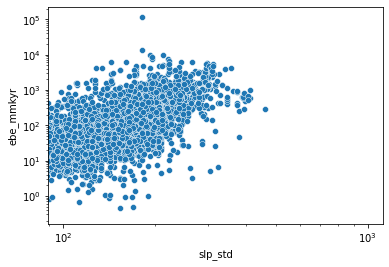

In [58]:
import seaborn as sns
gdb['slp_ave'][gdb['slp_ave'] <= 0] = np.nan
gdb['ebe_mmkyr'][gdb['ebe_mmkyr'] <= 0] = np.nan

p = sns.scatterplot(data=gdb,x='slp_std',y='ebe_mmkyr',)
p.set(xscale = 'log')
p.set(yscale = 'log')
#p.set(xlim=(10,100))
#p.set(ylim=(0,500))


In [59]:
gdb.to_file('/Users/gr_1/Documents/cosmo_predict/octopus_data')

In [142]:
import json

In [143]:
basins_final.to_file('/Users/gr_1/Documents/cosmo_predict/basins_final')

In [276]:
with open('/Users/gr_1/Documents/cosmo_predict/test.geojson','w') as f:
    f.write(basins_final.to_json())

In [39]:
x

NameError: name 'xbad' is not defined

In [13]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, GeoJSON

m = Map(basemap=basemaps.OpenTopoMap, zoom=1)
with open('/Users/gr_1/Documents/cosmo_predict/test.geojson','r') as f:
    fn = json.load(f)
    lyr = GeoJSON(data = fn, style = {'color': 'Blue', 'opacity':1, 'weight':2, 'dashArray':'9', 'fillOpacity':0.1})
    m.add_layer(gdb)
m

NameError: name 'json' is not defined

In [143]:
with open('/Users/gr_1/Documents/cosmo_predict/test.geojson', 'w') as f:
    f.write(P.to_json())


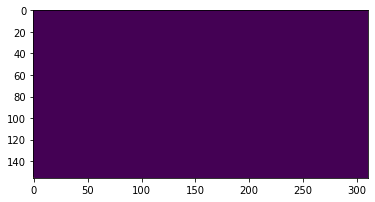

In [153]:
plt.imshow(b)

In [402]:
import subprocess
subprocess.call("ogr2ogr -f KML /Users/gr_1/Documents/cosmo_predict/test.kml /Users/gr_1/Documents/cosmo_predict/test.json ",shell=True)

1

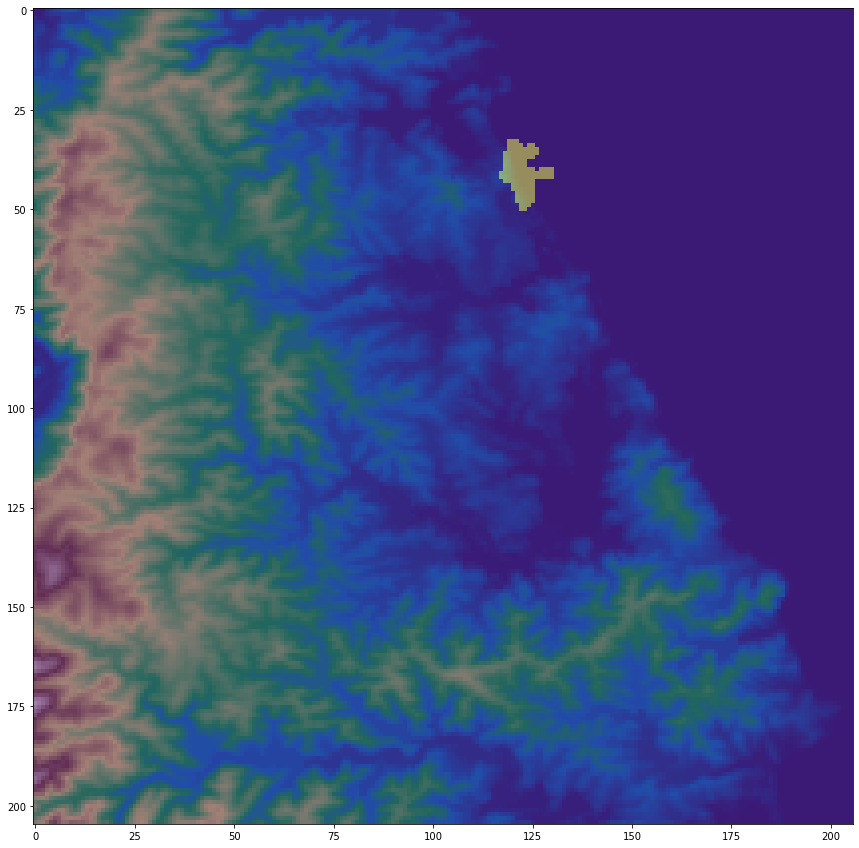

In [407]:
fig,ax = plt.subplots(figsize=(15,15))
plt.imshow(image,cmap='terrain',vmin=0)
plt.imshow(b,alpha=.5)


### Generage Bounding box

In [51]:
import geopandas as gpd
from rasterio import fill
basins = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/basins_pt/basins_pt.shp')

In [239]:
from shapely.geometry import Point
pts = pd.read_csv('/Users/gr_1/Documents/cosmo_predict/a.csv')
ptsl = pts.copy()
pt = [Point(pts.loc[i,'Longitude (decimal degrees)'],pts.loc[i,'Latitude (decimal degrees)']) for i in pts.index]
pts = gpd.GeoDataFrame()
pts.geometry = pt

In [10]:
import json

In [250]:
len(pts)

1390

In [ ]:
b = pd.read_pickle('/users/gr_1/Documents/cosmo_predict/BASINS_n')


In [ ]:
b = pd.read_pickle('/users/gr_1/Documents/cosmo_predict/BASINS_n')
b.index = b['HYBAS_ID']
bboxs = []
geoms = []
xs = []
minxs = []
minys = []
maxxs = []
maxys = []
id =[]
C=0
for i,row in b.iterrows():
    try:
        geom = np.squeeze(json.loads(row['.geo'])['coordinates'])
        if any(pts.within(Polygon(geom))):
            geoms.append(geom)
            maxxs.append(row['maxx'])
            maxys.append(row['maxy'])
            minxs.append(row['minx'])
            minys.append(row['miny'])
            id.append(row['HYBAS_ID'])
    except:
        try:
            geom = np.squeeze(json.loads(row['.geo'])['coordinates'][0])
            if any(pts.within(Polygon(geom))):
                geoms.append(geom)
                maxxs.append(row['maxx'])
                maxys.append(row['maxy'])
                minxs.append(row['minx'])
                minys.append(row['miny'])
                id.append(row['HYBAS_ID'])

        except:
            geom = np.squeeze(json.loads(row['.geo'])['coordinates'][0][0])
            if any(pts.within(Polygon(geom))):
                geoms.append(geom)
                maxxs.append(row['maxx'])
                maxys.append(row['maxy'])
                minxs.append(row['minx'])
                minys.append(row['miny'])
                id.append(row['HYBAS_ID'])

    if np.mod(C,1000) == 0:
        print(C/len(b))

    C+=1


In [169]:
Gs

geometry      minxs  \
id                                                                         
2090709100  POLYGON ((-3.72943 36.88864, -3.72027 36.88629...  36.870478   
2090563620  POLYGON ((11.70833 43.87917, 11.71667 43.87917...  43.807979   
2090556240  POLYGON ((6.33333 44.85000, 6.33393 44.82601, ...  44.775002   
2090554660  POLYGON ((5.78723 44.89678, 5.79967 44.89497, ...  44.816668   
2090554750  POLYGON ((5.78693 44.86325, 5.78807 44.86029, ...  44.737501   
...                                                       ...        ...   
6090764660  POLYGON ((-69.53333 -23.44583, -69.53298 -23.4... -23.595833   
6090764520  POLYGON ((-69.49224 -23.39878, -69.48750 -23.4... -23.495833   
6090768740  POLYGON ((-68.17083 -23.70000, -68.17026 -23.7... -23.804166   
6090774240  POLYGON ((-70.15000 -24.12083, -70.14256 -24.1... -24.366669   
6090047050  POLYGON ((-69.14223 -23.66175, -69.14042 -23.6... -23.683334   

                minys      maxxs      maxys       minx       maxx       miny  \
id                                                                             
2090709100  -3.729432  37.058902  -3.404167  36.870478  37.058902  -3.729432   
2090563620  11.708333  44.391666  12.229165  43.807979  44.391666  11.708333   
2090556240   6.333333  44.954521   6.567235  44.775002  44.954521   6.333333   
2090554660   5.787231  45.037500   6.174999  44.816668  45.037500   5.787231   
2090554750   5.786932  44.883331   6.441666  44.604165  44.883331   5.786932   
...               ...        ...        ...        ...        ...        ...   
6090764660 -69.533331 -23.253815 -69.004165 -23.754166 -23.253815 -69.533331   
6090764520 -69.492236 -23.195833 -69.116668 -23.495833 -23.195833 -69.492236   
6090768740 -68.170835 -23.687030 -67.791669 -24.187502 -23.687030 -68.170835   
6090774240 -70.149998 -23.979168 -69.804168 -24.366669 -23.979168 -70.149998   
6090047050 -69.142232 -23.425000 -69.012499 -23.683334 -23.425000 -69.142232   

                 maxy         idx  
id                                 
2090709100  -3.404167  2090709100  
2090563620  12.229165  2090563620  
2090556240   6.567235  2090556240  
2090554660   6.174999  2090554660  
2090554750   6.441666  2090554750  
...               ...         ...  
6090764660 -69.004165  6090764660  
6090764520 -69.116668  6090764520  
6090768740 -67.791669  6090768740  
6090774240 -69.804168  6090774240  
6090047050 -69.012499  6090047050  

[516 rows x 10 columns]

In [31]:
Gs['.geo'] = Gs.geometry.to_json()

In [41]:
Gs['minx'] = Gs['minxs'] 
Gs['maxx'] = Gs['maxxs'] 
Gs['miny'] = Gs['minys'] 
Gs['maxxs'] = Gs['maxys'] 


In [43]:
cpr[cpr['maxx'] == True]

Empty GeoDataFrame
Columns: [.geo, COAST, DIST_MAIN, DIST_SINK, ENDO, HYBAS_ID, MAIN_BAS, NEXT_DOWN, NEXT_SINK, NEXT_UP, ORDER, PFAF_ID, SORT, SUB_AREA, UP_AREA, geometry, idx, maxx, maxxs, maxy, maxys, mean, minx, minxs, miny, minys, system:index]
Index: []

[0 rows x 27 columns]

In [60]:
Gs = gpd.GeoDataFrame()
geomsp = []
for i in range(len(geoms)):
    geomsp.append(Polygon(geoms[i]))
Gs.geometry = geomsp
Gs['minxs']= minxs
Gs['minys'] = minys
Gs['maxxs'] = maxxs
Gs['maxys'] = maxys
Gs.to_file('all_basins_final')
Gs['id'] = id

In [78]:
b[b['HYBAS_ID'] == id].index

Int64Index([2090709100], dtype='int64', name='HYBAS_ID')

In [98]:
for i in b.iloc[0]['NEXT_UP']:
    print(i)

2090643100
2090642990
2090642360
2090642090
2090640820
2090640690
2090640580
2090640810
2090639080
2090638990


In [108]:
Gs.index = Gs['id']
for id in Gs['id']:
    minx = b.loc[id,'minx']
    maxx = b.loc[id,'maxx']
    miny = b.loc[id,'miny']
    maxy = b.loc[id,'maxy']

    for i in b.loc[id]['NEXT_UP']:
        if minx > b.loc[i].minx:
            minx = b.loc[i].minx
        if maxx < b.loc[i].maxx:
            maxx = b.loc[i].maxx
        if miny > b.loc[i].miny:
            miny = b.loc[i].miny
        if maxy < b.loc[i].maxy:
            maxy = b.loc[i].maxy
    Gs.loc[id,'minx'] = minx
    Gs.loc[id,'maxx'] = maxx
    Gs.loc[id,'miny'] = miny
    Gs.loc[id,'maxy'] = maxy
    

In [115]:
#Gs['idx'] = Gs['id']
#Gs = Gs.drop('id',1)
Gs.to_file('/Users/gr_1/Documents/cosmo_predict/all_basins_final')

In [118]:
basins = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/all_basins_final')

In [237]:
ptmin = np.argmin(np.sqrt((LON.ravel() - pt.geometry.coords[0][0]) ** 2 + (LAT.ravel() - pt.geometry.coords[0][1]) ** 2))
ptd

geometry
792  POINT (-3.48000 37.00000)
793  POINT (-3.48000 37.00000)
794  POINT (-3.48000 37.00000)
795  POINT (-3.48000 37.00000)
796  POINT (-3.48000 37.00000)
797  POINT (-3.48000 37.00000)
798  POINT (-3.48000 37.00000)

In [269]:
i

208

In [261]:
ptmin-len(image.ravel())

-27853

In [ ]:
geoms = []
xnot = []
ynot = []
ids = []
i=0
for i, b in basins.iterrows():
    lons = [b['miny'],b['maxy']]
    lats = [b['minx'],b['maxx']]
    sz = 1200.0

    if (np.abs(np.diff(lons)[0]>2)) or (np.abs(np.diff(lats)[0]>2)):
        sz = 120
        print('xx')

          
    nx = np.int(np.ceil(np.diff(lons)*sz))
    ny = np.int(np.ceil(np.diff(lats)*sz))
    nx,ny
    geo_elevation_data = srtm.get_data()
    image = geo_elevation_data.get_image(size=(nx, ny),latitude_interval = lats,longitude_interval = lons,max_elevation = 10000,mode='array')
    LON,LAT = np.meshgrid(np.linspace(lons[0]+1/sz,lons[1],nx),np.linspace(lats[0]+1/sz,lats[1],ny))
    ptd = pts[pts.within(b.geometry)]
    mask = np.ones(np.shape(image),np.int8)
    mask[np.isnan(image)] = False
    image = fill.fillnodata(image,mask)   
    image[np.isnan(image)] = 0
    image[image > 100000] = 0
    for j,pt in ptd.iterrows():
        import simplem
        a = simplem.fs()

        
        a.set_z(image)
        a.sinkfill()
        a.slp()
        a.stack()
        a.acc()
        #a.chicalc();
        ptmin = np.argmin(np.sqrt((LON.ravel() - pt.geometry.coords[0][0]) ** 2 + (LAT.ravel() - pt.geometry.coords[0][1]) ** 2))
        Arange = np.zeros(0)
        searchp = 5
        m,n = np.shape(a.A)
        xy = np.unravel_index(int(ptmin),np.shape(image))
        searchp = min([5,xy[0]])
        searchp = min([searchp,xy[1]])
        searchp = min([searchp, m - xy[0]-1])
        searchp = min([searchp, n - xy[1]-1])
        print(searchp)

        Arange = a.A[xy[0]-searchp:xy[0]+searchp+1,xy[1]-searchp:xy[1]+searchp+1]
            #Arange[Arange<50] = 9999999

        lat_to_m = 30.8#np.cos(180 / pt.geometry.coords[0][1] * np.pi) * 1852/60
        print(lat_to_m)
        maxa = np.argmin(np.abs(Arange*(3600/sz*30)**2/1e6 - ptsl.loc[ptd.loc[j:j].index,'Basin Area (km )'].to_numpy()))
        xy2 = np.unravel_index(int(maxa),(searchp*2+1,searchp*2+1))
        xy3 = [0,0]
        xy3[0] = xy[0]
        xy3[1] = xy[1]
        xy3[0] += xy2[0]-searchp
        xy3[1] += xy2[1]-searchp
        a.Z[xy3[0],xy3[1]] = 0
        a.slp()
        a.stack()
        a.acc(a.Z)
        i1 = a.A[xy3[0],xy3[1]]
        a.acc()
        i2 = a.A[xy3[0],xy3[1]]
        x,y,b1 = a.single_basin_delineate([xy3[0],xy3[1]])
        b1 = np.int32(b1)
        lonlat = [(LON[y[i],x[i]],LAT[y[i],x[i]]) for i in range(len(x))]
        mask = None
        with rasterio.Env():

            results = (
            {'properties': {'raster_val': v}, 'geometry': s}
            for u, (s, v) 
            in enumerate(
                shapes(b1)))
        gs = list(results)
        
        try:
            cs = np.squeeze(gs[0]['geometry']['coordinates'])
            cs = np.int16(cs)
            shps = [[LON[c[1],c[0]],LAT[c[1],c[0]]] for c in cs]
        except:            
            xnot.append([i])
            ynot.append([j])
        geoms.append(Polygon(shps))
        ids.append(ptsl.loc[ptd.loc[j:j].index].index.to_numpy())
    #i+=1
   # if i==1:
        
    print(i)
        

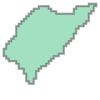

In [274]:
geoms[10]

In [275]:
basins_final = gpd.GeoDataFrame()
basins_final.geometry = geoms
basins_final['id'] = np.squeeze(ids)
basins_final.to_file('/Users/gr_1/Documents/cosmo_predict/basins_final')

In [139]:
#cs2 = cs.copy()
cs = np.squeeze(gs[0]['geometry']['coordinates'])
cs = np.array(cs2[0])
cs = np.int16(cs)
shps = [[LON[c[1],c[0]],LAT[c[1],c[0]]] for c in cs]
geoms.append(Polygon(shps))

NameError: name 'cs2' is not defined

In [27]:
cs

array([[  0,   0],
       [  0, 175],
       [221, 175],
       [221,   0],
       [  0,   0]], dtype=int16)

<AxesSubplot:>

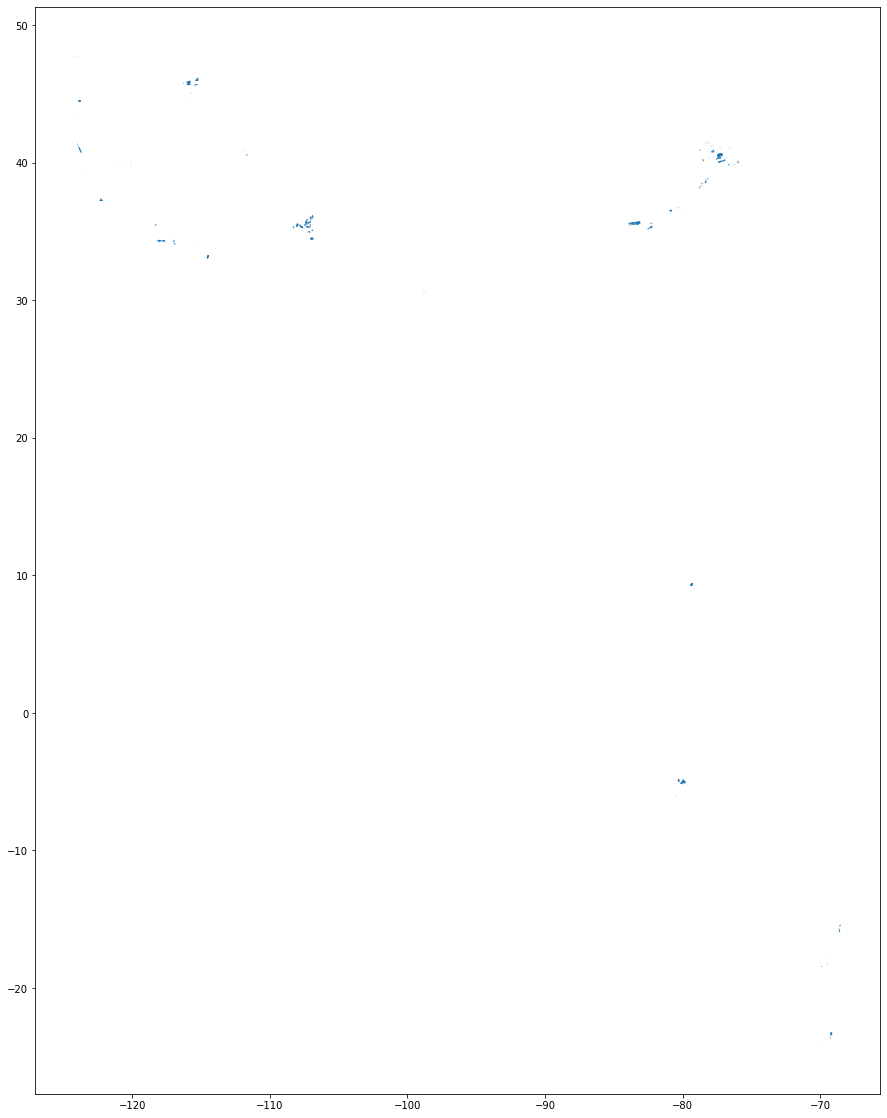

In [118]:
fig,ax = plt.subplots(figsize=(20,20))
P.plot(ax=ax)

In [120]:
P.to_file('/Users/gr_1/Documents/cosmo_predict/all_basins_pb')

In [121]:
P

geometry
0    POLYGON ((-124.24609 47.71235, -124.24692 47.7...
1    POLYGON ((-124.03893 47.75231, -124.03893 47.7...
2    POLYGON ((-124.03311 47.75314, -124.03228 47.7...
3    POLYGON ((-124.09465 43.48000, -124.09382 43.4...
4    POLYGON ((-124.03179 41.43583, -124.03096 41.4...
..                                                 ...
637  POLYGON ((-68.58352 -15.38881, -68.58269 -15.3...
638  POLYGON ((-68.57334 -15.99493, -68.57417 -15.9...
639  POLYGON ((-68.55500 -15.96500, -68.55584 -15.9...
640  POLYGON ((-68.53584 -15.30853, -68.53500 -15.3...
641  POLYGON ((-68.45917 -15.32351, -68.45834 -15.3...

[642 rows x 1 columns]

### Deprecate by factor

In [6]:
fact = 1
nx/=fact
ny/=fact

In [7]:
geo_elevation_data = srtm.get_data()
image = geo_elevation_data.get_image(size=(nx, ny),latitude_interval = lats,longitude_interval = lons,max_elevation = 5000,mode='array')


In [16]:
mm,nn = np.shape(image)
mm,nn

(1680, 6428)

In [ ]:
##Get rid of nans



In [9]:
nans = np.where(np.isnan(image.ravel(order='F')))[0]
nans

array([], dtype=int64)

In [23]:
4*nn/2.5

10284.8

In [24]:
image = image[:,:int(2.5*nn/4)]

In [102]:
a

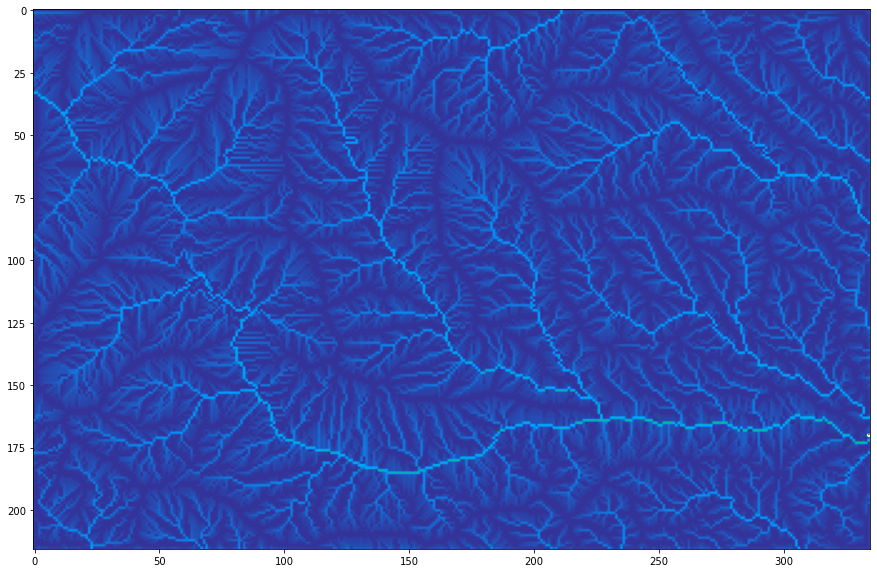

In [179]:
fig,ax = plt.subplots(figsize=(15,15))
a.A[xy[0],xy[1]] = 1000000000000000000000
im=plt.imshow(np.log(a.A),cmap = 'terrain')

In [178]:
lats[0]

-15.4416662899605

<ipython-input-180-e67073161767>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-180-e67073161767>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


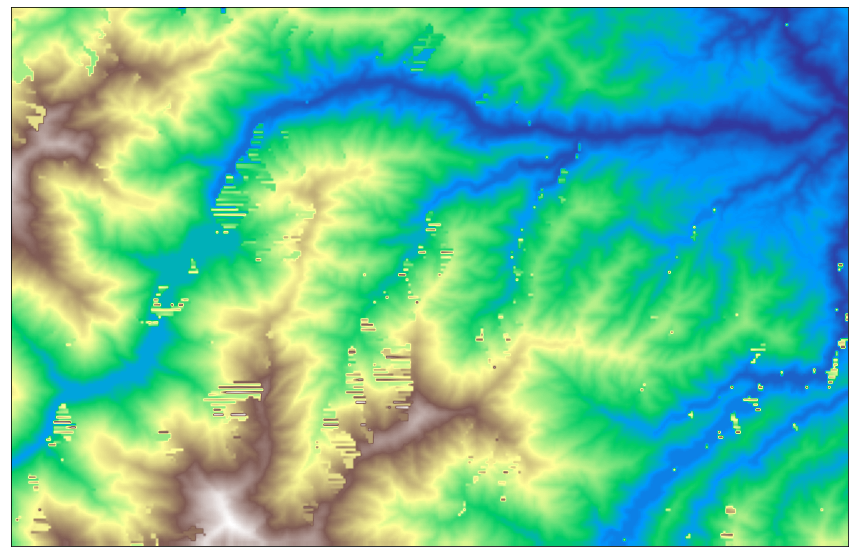

In [180]:
#image[xy3[0],xy3[1]] = 2000
from matplotlib.colors import LightSource
ls = LightSource(azdeg=30, altdeg=50)
shd = ls.shade(np.flipud(image), cmap=plt.get_cmap('gray') , blend_mode='soft')
fig,ax = plt.subplots(figsize=(15,15))
im=plt.imshow(np.flipud(image),cmap = 'terrain')

#im=plt.imshow(shd,alpha=.4)
ax.set_xticks([], [])
ax.set_yticks([], [])
#plt.colorbar(im)
#plt.plot(ptmin)
plt.show()


In [66]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import simplem
a = simplem.fs()
a.set_z(image)
a.sinkfill()
a.slp()
a.stack()
a.acc()
a.chicalc();

here


In [178]:
import matplotlib.pyplot as plt
import copy


[0.267004, 0.004874, 0.329415]

In [207]:
import matplotlib.pyplot as plt

<ipython-input-180-770c4cf33168>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-180-770c4cf33168>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


[]

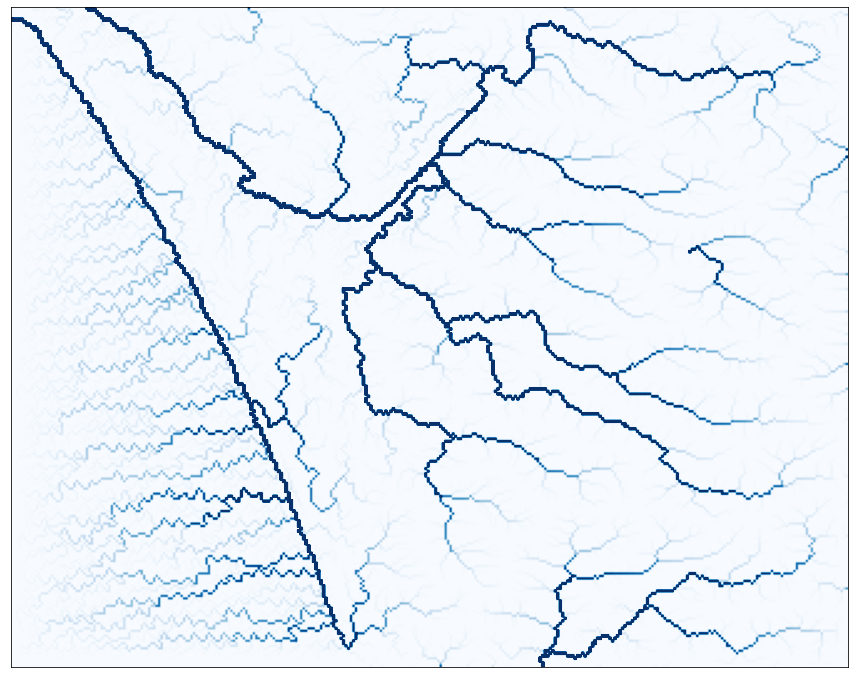

In [180]:
fig,ax = plt.subplots(figsize=(15,15))
plt.imshow(a.A,vmin=0,vmax=1000,cmap="Blues")

ax.set_xticks([], [])
ax.set_yticks([], [])

<ipython-input-213-5f83de910820>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-213-5f83de910820>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


[]

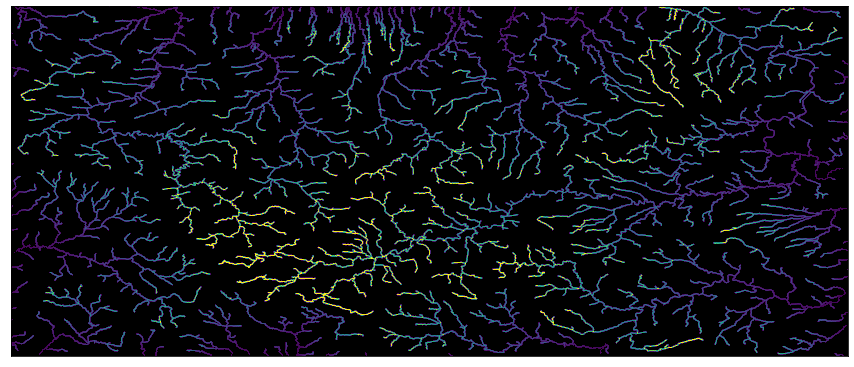

In [213]:
fig,ax = plt.subplots(figsize=(15,15))
chi = a.chi.copy()
chi[a.A<2000] = .00000000010
cmap = copy.deepcopy(plt.cm.viridis)
for i in range(1):
    cmap._lut[i] = [0.0,0.0,0.0,1]
    cmap.colors[i] = [0.0,0.0,0.0]


#chi = np.ma.masked_where(chi <= .000000001, chi)
plt.imshow(chi,vmin=0,vmax=.001,cmap=cmap)
ax.set_xticks([], [])
ax.set_yticks([], [])


<ipython-input-310-eb5164df6e04>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-310-eb5164df6e04>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


[]

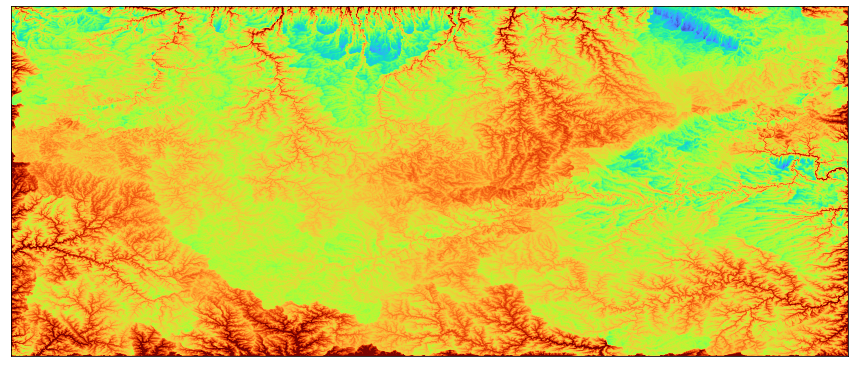

In [310]:
fig,ax = plt.subplots(figsize=(15,15))
chi = a.chi.copy()
z = a.Z.copy()

#chi[chi<=.0005]=1000000000000000000000000
dchi = np.divide(z,chi)
dchi = np.log(dchi)
#dchi[a.A<2000] = np.min(dchi)
cmap = copy.deepcopy(plt.cm.turbo)

#for i in range(1):
    #cmap._lut[i] = [0.0,0.0,0.0,1]
    #cmap.colors[i] = [0.0,0.0,0.0]
    

#chi = np.ma.masked_where(chi <= .000000001, chi)
plt.imshow(dchi,vmax = 12.5,cmap=cmap)
ax.set_xticks([], [])
ax.set_yticks([], [])
#plt.colorbar()

In [292]:
np.max(dchi)

18.770446233596292

In [306]:
import simplem
for i in range(1,100):
    a2= simplem.fs()
    a2.sinkfill()
    a2.slp()
    a2.stack()
    a2.acc()
    a2.erode()
a2.chicalc();

<ipython-input-307-41ed872bad6e>:7: RuntimeWarning: divide by zero encountered in log
  dchi = np.log(dchi)
<ipython-input-307-41ed872bad6e>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-307-41ed872bad6e>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


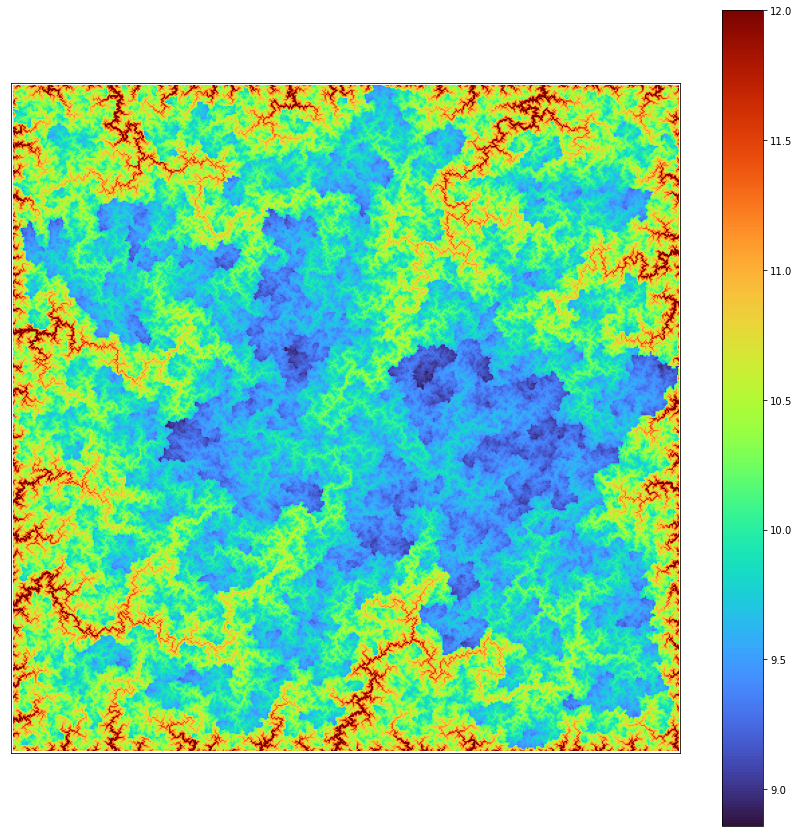

In [307]:
fig,ax = plt.subplots(figsize=(15,15))
chi = a2.chi.copy()
z = a2.Z.copy()

#chi[chi<=.0005]=1000000000000000000000000
dchi = np.divide(z,chi)
dchi = np.log(dchi)
#dchi[a.A<2000] = np.min(dchi)
cmap = copy.deepcopy(plt.cm.turbo)

#for i in range(1):
    #cmap._lut[i] = [0.0,0.0,0.0,1]
    #cmap.colors[i] = [0.0,0.0,0.0]
    

#chi = np.ma.masked_where(chi <= .000000001, chi)
plt.imshow(dchi,vmax = 12,cmap=cmap)
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.colorbar()